In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [4]:
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/data"

Mounted at /content/drive


In [5]:
img_size = (128, 128)
batch_size = 32


In [6]:
# Data Augmentation and Image Loading
def load_data(data_dir, img_size, batch_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training'
    )

    val_generator = datagen.flow_from_directory(
        data_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, val_generator

train_generator, val_generator = load_data(data_dir, img_size, batch_size)
num_classes = len(train_generator.class_indices)

Found 376 images belonging to 5 classes.
Found 93 images belonging to 5 classes.


In [7]:
# Define ANN Model
def create_ann_model(input_shape, num_classes):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

ann_model = create_ann_model(img_size + (3,), num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Define CNN Model
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_model = create_cnn_model(img_size + (3,), num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# Train Model
def train_model(model, train_generator, val_generator, epochs, model_name):
    history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)
    return history

ann_history = train_model(ann_model, train_generator, val_generator, epochs=10, model_name="ANN")
cnn_history = train_model(cnn_model, train_generator, val_generator, epochs=10, model_name="CNN")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 200s 17s/step - accuracy: 0.3400 - loss: 4.3862 - val_accuracy: 0.5699 - val_loss: 1.8871
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 282ms/step - accuracy: 0.6890 - loss: 1.5421 - val_accuracy: 0.7742 - val_loss: 0.4180
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.7285 - loss: 0.8597 - val_accuracy: 0.7957 - val_loss: 0.3883
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - accuracy: 0.8140 - loss: 0.4411 - val_accuracy: 0.7957 - val_loss: 0.4000
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.8084 - loss: 0.4828 - val_accuracy: 0.7957 - val_loss: 0.5206
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.8859 - loss: 0.2890 - val_accuracy: 0.8387 - val_loss: 0.3798
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 353ms/step - accuracy: 0.8809 - loss: 0.3041 - val_accuracy: 0.8280 - val_loss: 0.4288
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.8494 - loss: 0.3174 - val_accuracy: 0.

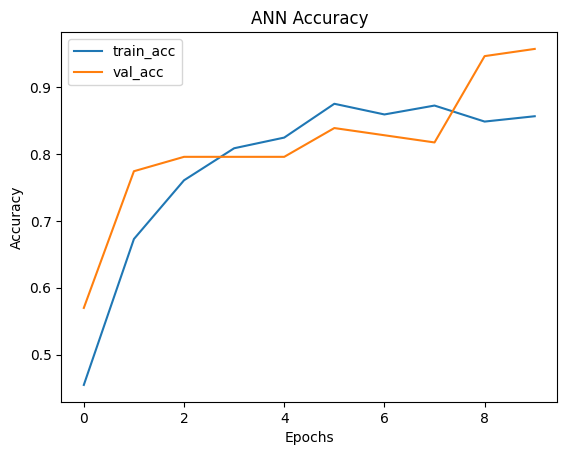

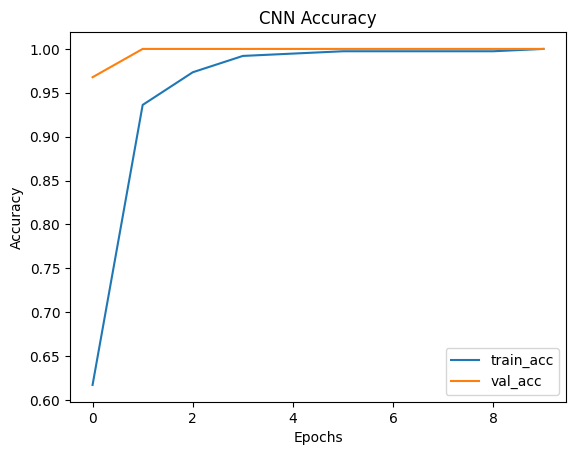

In [10]:
# Compare Performance
def plot_history(history, title):
    plt.plot(history.history['accuracy'], label='train_acc')
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(ann_history, "ANN Accuracy")
plot_history(cnn_history, "CNN Accuracy")
